<a href="https://colab.research.google.com/github/ScottHershberger5/cs417/blob/main/labs/lab10/notebooks/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 10: Searching Analysis

Paste your completed search functions below, then work through the three experiments.

For each experiment: **run the code**, then **answer the questions** in the markdown cells.

In [1]:
# Paste your four search functions here:
# - sequential_search
# - binary_search
# - sequential_search_counted
# - binary_search_counted

def sequential_search(a_list, target):
    """
    Search for target in a_list by checking each item from the start.

    Args:
        a_list: A list of items (not necessarily sorted).
        target: The item to search for.

    Returns:
        True if target is found, False otherwise.
    """
    pos = 0
    while pos < len(a_list):
        if a_list[pos] == target:
            return True
        pos += 1
    return False


# ── TODO 2: Binary Search ────────────────────────────────────────


def binary_search(a_list, target):
    """
    Search for target in a sorted list by repeatedly halving
    the search space.

    The list MUST be sorted in ascending order for this to work.

    Algorithm:
        1. Set first = 0, last = len(a_list) - 1
        2. While first <= last:
           - Compute mid = (first + last) // 2
           - If a_list[mid] == target → return True
           - If target < a_list[mid] → search the left half (last = mid - 1)
           - If target > a_list[mid] → search the right half (first = mid + 1)
        3. If the loop ends → return False

    Args:
        a_list: A sorted list of items.
        target: The item to search for.

    Returns:
        True if target is found, False otherwise.
    """
    start = 0
    last = len(a_list) - 1
    if start == last: # chackes list if its empty or has one element
        return True if a_list[0] == target else False
    while start <= last:
        mid = (start + last) // 2
        if a_list[mid] == target:
            return True
        elif target < a_list[mid]:
            last = mid - 1
        elif target > a_list[mid]:
            start = mid + 1
    return False
    # print(start, last)
    # if a_list[start] == target: #checks the last two items
    #     return True
    # elif a_list[last] == target:
    #     return True
    # else:
    #     return False


# ── TODO 3: Counted Versions ─────────────────────────────────────


def sequential_search_counted(a_list, target):
    """
    Same as sequential_search, but also counts comparisons.

    A "comparison" is each time you check whether a list element
    equals the target.

    Args:
        a_list: A list of items (not necessarily sorted).
        target: The item to search for.

    Returns:
        A tuple (found, comparisons) where:
            found: True if target is in the list, False otherwise.
            comparisons: The number of element-to-target comparisons made.

    Example:
        sequential_search_counted([4, 8, 2, 15, 17], 17)  → (True, 5)
        sequential_search_counted([4, 8, 2, 15, 17], 99)  → (False, 5)
    """
    pos = 0
    compare = 0
    while pos < len(a_list):
        if len(a_list) == 0: # if list is empty return False
            compare += 1
            return (False, compare)
        if a_list[pos] == target:
            compare += 1
            return (True, compare)
        compare += 1
        pos += 1
    return (False, compare)


def binary_search_counted(a_list, target):
    """
    Same as binary_search, but also counts comparisons.

    A "comparison" is each time you check a_list[mid] against the target.
    Count one comparison per loop iteration (the mid check).

    Args:
        a_list: A sorted list of items.
        target: The item to search for.

    Returns:
        A tuple (found, comparisons) where:
            found: True if target is in the list, False otherwise.
            comparisons: The number of midpoint-to-target comparisons made.

    Example:
        binary_search_counted([2, 4, 8, 15, 17], 17)  → (True, 3)
        binary_search_counted([2, 4, 8, 15, 17], 99)  → (False, 3)
    """
    start = 0
    last = len(a_list) - 1
    compare = 0
    if start == last: # chackes list if its empty or has one element
        compare += 1
        return (True, compare) if a_list[0] == target else (False, compare)
    while start <= last:
        mid = (start + last) // 2
        if a_list[mid] == target:
            compare += 1
            return (True, compare)
        elif target < a_list[mid]:
            compare += 1
            last = mid - 1
        elif target > a_list[mid]:
            compare += 1
            start = mid + 1
    return (False, compare)


In [2]:
# Imports for the experiments
import random
import matplotlib.pyplot as plt

---
## Experiment 1: The Comparison Race

Run both counted searches on sorted lists of increasing size and plot the comparison counts.

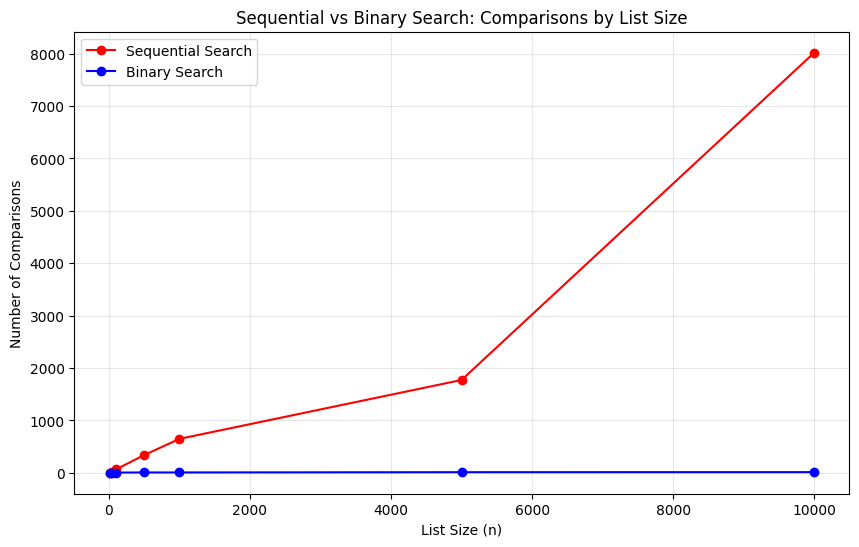

In [5]:
sizes = [10, 50, 100, 500, 1000, 5000, 10000]
seq_counts = []
bin_counts = []

for n in sizes:
    # Generate a sorted list of n items
    test_list = list(range(n))
    # Pick a random target (might or might not be in the list)
    target = random.randint(0, n)

    _, s_count = sequential_search_counted(test_list, target)
    _, b_count = binary_search_counted(test_list, target)

    seq_counts.append(s_count)
    bin_counts.append(b_count)

plt.figure(figsize=(10, 6))
plt.plot(sizes, seq_counts, 'o-', label='Sequential Search', color='red')
plt.plot(sizes, bin_counts, 'o-', label='Binary Search', color='blue')
plt.xlabel('List Size (n)')
plt.ylabel('Number of Comparisons')
plt.title('Sequential vs Binary Search: Comparisons by List Size')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Experiment 1 Questions

**Q1:** Describe the shape of each curve. Why does one grow so much faster than the other?

*Your answer:* The sequential search curve increases much faster while the binary search curve is pretty much flat, almost constant time. Sequential search grows so much faster because it is O(n) complexity, while binary search is O(logn) complexity.


**Q2:** At what list size does the difference start to feel significant?

*Your answer:* Around list size 1000 I would say.


---
## Experiment 2: Best Case, Worst Case

How much does performance vary depending on *where* the target is (or if it's there at all)?

In [6]:
n = 10000
test_list = list(range(n))

# Sequential search: best case vs worst case
_, seq_best = sequential_search_counted(test_list, test_list[0])      # first element
_, seq_worst = sequential_search_counted(test_list, n + 1)            # not in list

print("=== Sequential Search (n = 10,000) ===")
print(f"Best case  (first element):  {seq_best} comparisons")
print(f"Worst case (not in list):    {seq_worst} comparisons")
print()

# Binary search: does target position matter?
_, bin_first = binary_search_counted(test_list, test_list[0])         # first element
_, bin_last = binary_search_counted(test_list, test_list[-1])         # last element
_, bin_mid = binary_search_counted(test_list, test_list[n // 2])      # middle element
_, bin_miss = binary_search_counted(test_list, n + 1)                 # not in list

print("=== Binary Search (n = 10,000) ===")
print(f"First element:    {bin_first} comparisons")
print(f"Last element:     {bin_last} comparisons")
print(f"Middle element:   {bin_mid} comparisons")
print(f"Not in list:      {bin_miss} comparisons")

=== Sequential Search (n = 10,000) ===
Best case  (first element):  1 comparisons
Worst case (not in list):    10000 comparisons

=== Binary Search (n = 10,000) ===
First element:    13 comparisons
Last element:     14 comparisons
Middle element:   13 comparisons
Not in list:      14 comparisons


### Experiment 2 Questions

**Q3:** Why does sequential search have such a huge gap between best and worst case?

*Your answer:* Because it is O(n) and it could encounter the target right away (best case) or it could take n attempts (worst case).


**Q4:** Why is binary search so consistent regardless of where the target is? What about the algorithm causes this?

*Your answer:* It is so consistent because it always halves n, no matter how big n gets, it will always eliminate half of n each time it compares.


---
## Experiment 3: When Is Sorting Worth It?

Binary search requires sorted data, and sorting costs O(n log n). If you have an unsorted list and need to search it *k* times, when does it pay to sort first?

**The two options:**
- **Option A:** Sequential search each time. Total cost: k × n
- **Option B:** Sort first (n log n), then binary search each time. Total cost: n log n + k × log n

### Q5: Calculate the crossover

For n = 10,000: set the two cost formulas equal and solve for *k*. Show your work.

*Your answer:*

kn = nlogn + klogn

kn - klogn = nlogn

k(n-logn)=nlogn

k= n−logn / nlogn
	​

k = 13.3

In [7]:
import math

n = 10000
log_n = math.log2(n)  # approximately 13.3

# Try different values of k and compare total costs
print(f"n = {n}, log2(n) ≈ {log_n:.1f}")
print(f"{'k':>5}  {'Option A (k×n)':>15}  {'Option B (n·log n + k·log n)':>30}  {'Winner':>8}")
print("-" * 65)

for k in [1, 2, 5, 10, 13, 14, 15, 20, 50, 100]:
    cost_a = k * n
    cost_b = n * log_n + k * log_n
    winner = "A" if cost_a < cost_b else "B" if cost_b < cost_a else "Tie"
    print(f"{k:>5}  {cost_a:>15,.0f}  {cost_b:>30,.0f}  {winner:>8}")

n = 10000, log2(n) ≈ 13.3
    k   Option A (k×n)    Option B (n·log n + k·log n)    Winner
-----------------------------------------------------------------
    1           10,000                         132,890         A
    2           20,000                         132,904         A
    5           50,000                         132,944         A
   10          100,000                         133,010         A
   13          130,000                         133,050         A
   14          140,000                         133,063         B
   15          150,000                         133,076         B
   20          200,000                         133,143         B
   50          500,000                         133,542         B
  100        1,000,000                         134,206         B


### Experiment 3 Questions

**Q6:** Does the experimental crossover match your calculation? If not, why might they differ?

*Your answer:* Yes, the experimental crossover matches my calculation. The differences could be because of rounding.


**Q7:** Give a real-world example where you'd choose Option A (just search without sorting) and one where you'd choose Option B (sort first, then search).

*Your answer:* In the real-world I would choose option A when I have a short list, something like a line at a store, I would just go through one by one doing their orders. I would use option B if I have a lot of stuff to go through, like double checking recipts during tax season, I would want those sorted so I can find the right recipt easily.
